<figure>
<IMG SRC="images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>

# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Lecture 1: Statistics of Random Variables

Before we delve into time series analysis proper, it helps to review (?  Hopefully it is a review!) some concepts about the statistics of random variables.  

## Random Variable Definitions 

A **[Random Variable](http://en.wikipedia.org/wiki/Random_variable)** is a random outcome of an experiment.  For instance, the results of a dice roll are one realization of a random variable associated with that dice.  If I weigh myself on a scale and take a reading, the result is a random variable associated with my real weight at that point in time, and any randomness of the scale.

If we have a series of discrete measurements of the random variable ${x}$, we might index these by $k$, and call each realization $x(k)$.  So the first coin flip would be $x(1)$, the second $x(2)$.  

Underlying these realizations of the random variable is a **[Probability Distribution](http://en.wikipedia.org/wiki/Probability_distribution)**.  This is defined as:

$$P(x) = \mathrm{prob} \left[x(k)\leq x\right]$$

For a well defined random variable $P(-\infty)=0$ and $P(+\infty)=1$, and $0\leq P(x)\leq 1$.  Note that $P(x)$ is dimensionless.  

As an example, consider the dice roll random variable.  The probability of getting $x(k)\lt 1$ is zero.  The probabilty of $x\lt 2$ is $1/6$,  $x\lt 3$ is $2/6$, etc.  We might plot this as a series of stair steps:

<figure><IMG SRC="images/DiceCDF.png" WIDTH=400 ALIGN="center" ALT="Hi"></figure>

(note for the code used to make these plots, see [lectures/Notes01](http://nbviewer.ipython.org/github/jklymak/Phy411/blob/master/lectures/Notes01.ipynb).  I'm not including the code to maintain readibility)

Closely related to this is the **Probability Density Function** which is just the derivative of the *probability distribution*:

$$p(x) = \displaystyle\lim_{\Delta x\to 0} \frac{1}{\Delta x}\mathrm{prob}\left[x\lt x(k)\lt x+\Delta x\right] $$

Note that $p(x)$ has units of $(\Delta x)^{-1}$. Also note that it is related to the *probabilty distribution* as:

$$ P(x) = \int_{-\infty}^x p(x)\ \mathrm{d}x.$$

and over a limited interval:

$$ \mathrm{prob}(a\leq x \leq b) = \int_{a}^b p(x)\ \mathrm{d}x.$$


Because the result of the dice rolls $x(k)$ are discrete, the *probability density function* for the dice is formally undefined, but it can be represented as the sum of six delta functions centered at $x_0=1,2,3,4,5,6$:

$$p(x) = \frac{1}{6}\sum_{x_0=1}^6 \delta (x-x_0)$$

### Example: Uniform Distribution: $U[a,b]$

The uniform distribution has a *probability density function* that is uniform between $a$ and $b$, and zero elsewhere:

$$p(x) = \frac{1}{b-a}\ \  \mathrm{if}\ \   a\leq x\leq b $$  

The *probability distribution* is just the integral:

$$P(x) = \begin{cases}
     0,              & x\leq a\\
    \frac{x-a}{b-a},& \text{if } a\leq x\leq b\\
     1,              & b\leq x\\
   \end{cases} $$

<figure><IMG SRC="images/UniformDist.png" WIDTH=400 ALIGN="center" ALT="Hi"></figure>



## What questions might we ask about measurements or realizations of random variables?

It is often desireable to repeat an experiment a number of times (generate a large set of $x(k)$) in order to determine the underlying statistics of the random variable. There are a number of questions scientists ask about the distribution, and it is helpful to consider a few of them here before we delve into more definitions.

<figure>
<IMG SRC="images/loaded-dice.jpg" WIDTH=300 ALIGN="right">
</figure>

Consider the dice as an easy example.  If we didn't know anything about dice, how would we quantify the statistics of the random variable? Or perhaps more relevantly, what would we do to check if this dice agreed with what we think we know about dice?  

  1. The simplest thing would be to plot or tabulate the dice rolls and see if each value from 1 to 6 came up the same number of times as we would expect.  This would give a good feel for if the dice was fair.  

  2. We might calculate the *mean* of the dice rolls and compare that mean to the *mean* we expect (what mean do you expect?)
  
  3. We might calculate higher moments like the *variance* (or the *skew*, or the *kurtosis*), and again compare them to the theoretical values we expect.  

The *expected* value of the various statistics is something we would like to calculate theoretically, and *estimate* emperically from our data set.  

This is all fine, but how do we know we have a fair dice?  What if the dice is biased towards a six by 1%?  A very important (and difficult) question is how confident are we that the dice is fair? Or relatedly, how many times would we have to roll the dice in order to assert that it is fair with some degree of confidence?  

### Theoretical Statistical definitions

If we know the probability density function $p(x)$ then we can calculate a number of statistical quantities.  

**Mean**: is defined the expected value of x.  This can be calculated as
 
$$ \mu_x=E[x(k)]=\int_{-\infty}^{\infty} x\, p(x)\ \mathrm{d}x$$

For the dice:

$$ \mu_x = \sum_{x_0=1}^6 \frac{1}{6} x_0 = 3.5$$

For the uniform distribution:

$$ \mu_x = \int_a^b x \frac{1}{b-a}\ \mathrm{d}x = \frac{1}{b-a} \frac{(b^2-a^2)}{2} =  \frac{b+a}{2}$$

both of which are hopefully what you expected.

**Variance** is the expected value of the second momment:

$$ \mathrm{var}(x)=E\left[(x(k)-\mu_x)^2\right]=\int_{-\infty}^{\infty} (x-\mu_x)^2\, p(x)\ \mathrm{d}x$$

For the dice:

$$ \mathrm{var}(x) \sum_{x_0=1}^6 \frac{1}{6} (x_0-3.5)^2 = 2.92 $$

For the uniform distribution this gets a little messy, but is more elgant if we assume the distribution is uniform over [-a/2,+a/2].  

$$ \mathrm{var}(x) = \int_{-a/2}^{a/2} x^2 \frac{1}{a}\ \mathrm{d}x = \frac{a^2}{12}$$

** Skew ** is the expected value of the third momment:

$$ \mathrm{skew}(x)=E\left[(x(k)-\mu_x)^3\right]=\int_{-\infty}^{\infty} (x-\mu_x)^3\, p(x)\ \mathrm{d}x$$

and can represent how assymetrical the distribution is.  It is relatively straight forward to show that both the examples here have $\mathrm{skew}(x)=0$.

** Kurtosis ** is the expected value of the fourth momment:

$$ \mathrm{kurtosis}(x)=E\left[(x(k)-\mu_x)^4\right]=\int_{-\infty}^{\infty} (x-\mu_x)^4\, p(x)\ \mathrm{d}x$$

and represents how "peaked" the distribution is, or how long the tails at high and low distances from the mean are.  

For the uniform distribution over $[-a/2,+a/2]$:

$$ \mathrm{kurtosis}(x) = \int_{-a/2}^{a/2} x^4 \frac{1}{a}\ \mathrm{d}x = \frac{a^4}{80}$$

** Median ** 

This is the value at which the *probability distribution* reaches 1/2, i.e. $\mathrm{prob}(x\leq m) = 0.5$, where $m$ is the median.

For the uniform distribution, and any symmetrical distribution, the median is the same as the mean.  For the discrete dice distribution the meaning of the median is formally undefined, as it can lie anywhere between 3 and 4.  

## Parameter estimation from data populations

Lets return to the question of the dice, and if it is "fair".  We might roll it a number of times and build a "population" of rolls, which we may represent as $\{x_k\}$.  For example, we roll it 20 times, and tabulate the results.  Then we roll it 200 times, etc:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def getrolls(N,doprint=False,theseed=None):
    import numpy as np
    import scipy.stats as stats
    np.random.seed(seed=theseed) # This just makes the "random" result the same everytime 
                            # I run the code.
    xx=np.random.rand(N)*5.999999999+0.99999999 # this will be from 1. to 6.99999999
    xx=np.floor(xx) # this will return integers from 1 to 6
    if doprint:
        st=''
        hd=''
        for i in range(1,7):
            inds = np.where(xx==i)[0]
            hd = hd+'%d     '%i
            st+='%1.3f  '%(float(len(inds))/float(N))
        print 'Numer of rolls: %d' % N
        print hd
        print st
        print 'Mean: %1.3f'%np.mean(xx)
        print 'Variance: %1.3f'%np.var(xx)
        print 'Skewness: %1.3f'%stats.skew(xx)
        print 'Kurtosis: %1.3f'%stats.kurtosis(xx)
        print ''
    return xx
xx=getrolls(20,doprint=True,theseed=789)
xx=getrolls(200,doprint=True,theseed=789)
xx=getrolls(2000,doprint=True,theseed=789)
xx=getrolls(20000,doprint=True,theseed=789)
xx=getrolls(2000000,doprint=True,theseed=789)


Numer of rolls: 20
1     2     3     4     5     6     
0.250  0.250  0.050  0.200  0.200  0.050  
Mean: 3.000
Variance: 2.700
Skewness: 0.203
Kurtosis: -1.395

Numer of rolls: 200
1     2     3     4     5     6     
0.160  0.175  0.135  0.210  0.185  0.135  
Mean: 3.490
Variance: 2.740
Skewness: -0.058
Kurtosis: -1.221

Numer of rolls: 2000
1     2     3     4     5     6     
0.158  0.169  0.169  0.173  0.160  0.171  
Mean: 3.521
Variance: 2.882
Skewness: -0.002
Kurtosis: -1.250

Numer of rolls: 20000
1     2     3     4     5     6     
0.165  0.166  0.165  0.172  0.165  0.168  
Mean: 3.509
Variance: 2.906
Skewness: -0.006
Kurtosis: -1.261

Numer of rolls: 2000000
1     2     3     4     5     6     
0.166  0.167  0.166  0.167  0.167  0.167  
Mean: 3.502
Variance: 2.918
Skewness: -0.001
Kurtosis: -1.269



Hopefully it is clear that the bigger the sample size the better we are at estimating the parameters of the underlying distribution $\{x_k\}$.  20 rolls does a poor job (or you would have to be very lucky for 20 rolls to do a good job), and 2 million rolls does a good job (or you would have to be exceedingly *unlucky* for it to do a poor job). 

What did we do here? We *estimated* the parameters, like the mean, from the population $\{x_k\}$.  For the mean, the **Sample Mean** it is what you would expect:

$$\overline{x} = \frac{1}{N}\sum_{i=1}^N x_i$$

We might guess that the **Sample Variance** is:

$$\sigma^2_b = \frac{1}{N}\sum_{i=1}^N \left(x_i-\overline{x}\right)^2$$

but we will show below that this is a **biased estimator**.

Hopefully it is clear that $\overline{x}$ is itself a random variable.  If we repeat the test of rolling the dice 200 times, we will get different values of the sample mean. This random varibale $\{\overline{x}_n\}$ will have a distribution, and its own mean and variance.

To see what the distribution of $\{\overline{x}_n\}$ is, lets run the 200-dice-roll experiment 2000 times and tabulate the results:

In [5]:
Nexpts = 2000
means=np.zeros(Nexpts)
for i in range(Nexpts):
    xx=getrolls(200)
    means[i]=np.mean(xx)
means200=means

Mean of the means: 3.495
Standard deviation of the means: 0.121


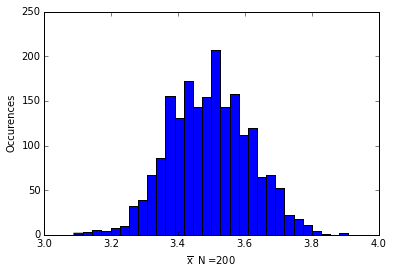

In [9]:
fig=plt.figure();ax=fig.add_subplot(1,1,1); 
ax.hist(means,30)
ax.set_xlabel('$\overline{x}\ \ N=200$');ax.set_ylabel('Occurences');ax.set_xlim([3.0,4.])
print 'Mean of the means: %1.3f' % np.mean(means)
print 'Standard deviation of the means: %1.3f' % np.std(means)

Se we see that running the 200-roll experiement yields a great variety of outcomes in the calculated mean, with means as low as 3.1, and as high as 3.9.  However, the nice thing is that the mean of the estimates is very close to the expected value of 3.5.  This gives us some hope that the *sample mean*, $\overline{x}$, is a good estimator of the *distribution mean*, $\mu_x$.   

What happens for 2000 2000-roll experiments? Hopefully each experiment will yield a better esitmate of $\mu_x$ than the 200-roll experiments.  

In [11]:
Nexpts = 2000
means=np.zeros(Nexpts)
for i in range(Nexpts):
    xx=getrolls(2000)
    means[i]=np.mean(xx)
means2000=means

Mean of the means: 3.499
Standard deviation of the means: 0.037


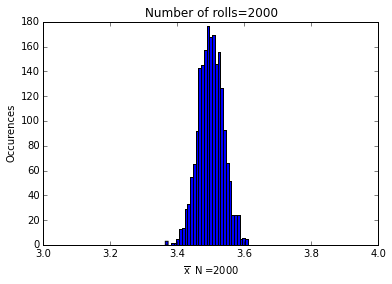

In [12]:
fig,ax=plt.subplots(1,1); 
ax.hist(means,30)
ax.set_xlabel('$\overline{x}\ \ N=2000$');ax.set_ylabel('Occurences');ax.set_xlim([3.0,4.])
ax.set_title('Number of rolls=2000')
print 'Mean of the means: %1.3f' % np.mean(means)
print 'Standard deviation of the means: %1.3f' % np.std(means)

As we can see, the distribution of the means is *much* tighter, and the sample mean of the means is exactly what we would expect theoretically.  

So for the 200-roll experiments we would say that we know the mean from any single experiment as $\overline{x}\pm0.122$.  For the 2000-roll experiments it is $\overline{x}\pm0.039$.  For a 20-roll experiment, the mean would be determined within one standard deviation as $\overline{x}\pm0.39$.  How do I know this?  Because the standard deviation is simply changing by a factor of $\sqrt{N}$ each time, and indeed is just equal to $\sqrt{var(x)}/\sqrt{N} = \sqrt{2.92/20}=0.39$.  

In [14]:
Nexpts = 2000
means=np.zeros(Nexpts)
for i in range(Nexpts):
    xx=getrolls(20)
    means[i]=np.mean(xx)
means20=means

Mean of the means: 3.502
Standard deviation of the means: 0.371


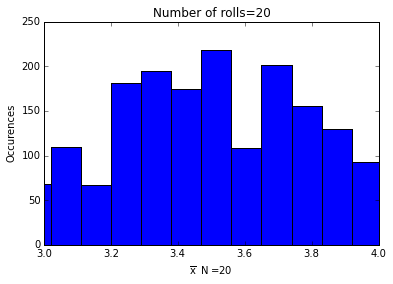

In [15]:
fig,ax=plt.subplots(1,1); 
ax.hist(means,30)
ax.set_xlabel('$\overline{x}\ \ N=20$');ax.set_ylabel('Occurences');ax.set_xlim([3.0,4.])
ax.set_title('Number of rolls=20')
print 'Mean of the means: %1.3f' % np.mean(means)
print 'Standard deviation of the means: %1.3f' % np.std(means)

### Good Estimator?

Is the *sample mean*, $\overline{x}$, a good estimate of the underlying distribution mean, $\mu_x$?  What characteristics do we seek in an estimator?

  1. "unbiased" i.e. $\mathrm{E}\left[\overline{x}\right]=\mu_x$
  
  2. "consistent": 
  
      $$\displaystyle\lim_{N\to\infty} \mathrm{E}\left[\left(\overline{x}-\mu_x\right)^2\right] =0$$
      
      i.e. the more data put into $\overline{x}$ is, the closer it gets to the theoretical mean $\mu_x$.
      
We saw above that both of these were indeed the case for the *sample mean* of the uniform distribution.  We can prove that it is true in general.

**Unbiased?**
From the definition of $\overline{x}$, and the fact that the expected value of a sum of variables is the sum of the expected values:

$$\mathrm{E}\left[\overline{x}\right] = \frac{1}{N}\sum_{i=1}^N \mathrm{E}\left[x_i\right]$$

$$= \frac{1}{N}\sum_{i=1}^N \mu_x = \mu_x$$

So, yes, the sample mean is unbiased.

**Consistent?**

We want to show that  $$\displaystyle\lim_{N\to\infty} \mathrm{E}\left[\left(\overline{x}-\mu_x\right)^2\right] =0$$

We can always remove the mean with a change of variables: $y_i=x_i-\mu_x$ so that we just have to show that 

 $$\displaystyle\lim_{N\to\infty} \mathrm{E}\left[\left(\overline{y}\right)^2\right] =0$$
 
 
 So:
 
\begin{align}
 \displaystyle\lim_{N\to\infty} \mathrm{E}\left[\left(\overline{y}\right)^2\right]&=
 \displaystyle \lim_{N\to\infty} \mathrm{E}\left[\left(\frac{1}{N}\sum_{i=1}^N y_i\right)^2\right]\\
 &= \displaystyle \lim_{N\to\infty} \frac{1}{N^2}\left(\sum_{i=1}^N \mathrm{E}\left[y_i^2\right]\right)\\
 &=\displaystyle \lim_{N\to\infty} \frac{1}{N^2}N \sigma_x^2\\
 &=\displaystyle \lim_{N\to\infty} \frac{1}{N} \sigma_x^2\\
 &=0
\end{align}
 
So, the *sample mean* is a *consistent* estimator of the distribtion mean.
 
Note that here, we also showed that the variance of the *sample mean* $\overline{x}$ decreases as the sample size $N$ increases:

$$\sigma_{\overline{x}}^2=E\left[\left(\overline{x}-\mu_x\right)^2\right]=\frac{1}{N} \sigma_x^2$$

which is what we showed emperically above. 

### Is the sample variance biased?

As we noted above, the sample variance might be:

$$\sigma^2_b = \frac{1}{N}\sum_{i=1}^N \left(x_i-\overline{x}\right)^2$$  

This turns out to be biased.  Again, assume $\mu_x=0.$ for simplicity.  Then if we foloow through the definitions of $E$ we see that:

\begin{align}
    E\left[\sigma^2_b\right] & = E\left[\frac{1}{N}\sum_{i=1}^N \left(x_i-\overline{x}\right)^2\right]\\
    &=  \frac{1}{N}E\left[\sum_{i=1}^N \left(x_i^2-2x_i\overline{x}+\overline{x}^2\right)\right]\\
    &=\frac{1}{N}E\left[\left(\sum_{i=1}^N x_i^2\right)-2N\overline{x}^2+N\overline{x}^2\right]\\
    &=E\left[\left(\frac{1}{N}\sum_{i=1}^N x_i^2\right)-\overline{x}^2\right]\\
    &=E\left[x_i^2\right]-E\left[\overline{x}^2\right]\\
    &=\sigma_x^2-\frac{1}{N}\sigma_x^2\\
    &=\sigma_x^2\left(1-\frac{1}{N}\right)\\
\end{align}

So we see that the naive  estimator is biased low.  

We can test this emperically by playing the same randomized game as above.  Here we calculate the variance of 6 rolls, 12 rolls, etc 2000 times each and then take the mean of the variances for the 2000 experiments:

In [17]:
Nexpts = 2000
Nrolls=[6,12,24,200,2000]
sampvarmean=np.zeros(6)
for nn,Nroll in enumerate(Nrolls):
    sampvars=np.zeros(Nexpts)
    for i in range(Nexpts):
        xx=getrolls(Nroll)
        sampvars[i]=np.sum((xx-np.mean(xx))**2)/Nroll
    sampvarmean[nn]=np.mean(sampvars)

In [18]:
print "Nrolls mean expected" 
for i in range(5):
    print "%7d %1.3f %1.3f"% (Nrolls[i],sampvarmean[i],2.92*(1.-1./Nrolls[i]))

Nrolls mean expected
      6 2.446 2.433
     12 2.675 2.677
     24 2.797 2.798
    200 2.897 2.905
   2000 2.920 2.919


So, as we see, the mean of the *sample variances* is biased low by a factor $(1-1/N_{rolls})$ (approximately).  Note as $N_{rolls}$ gets large, the bias drops. 

The *unbiased* estimator of the variance is simply:

$$\sigma^2 = \frac{1}{N-1}\sum_{i=1}^N \left(x_i-\overline{x}\right)^2$$  


In [20]:
Nexpts = 2000
Nrolls=[6,12,24,200,2000]
sampvarmean=np.zeros(6)
for nn,Nroll in enumerate(Nrolls):
    sampvars=np.zeros(Nexpts)
    for i in range(Nexpts):
        xx=getrolls(Nroll)
        sampvars[i]=np.sum((xx-np.mean(xx))**2)/(Nroll-1)
    sampvarmean[nn]=np.mean(sampvars)

In [21]:
print "Nrolls mean expected" 
for i in range(5):
    print "%7d %1.3f %1.3f"% (Nrolls[i],sampvarmean[i],2.92)

Nrolls mean expected
      6 2.929 2.920
     12 2.944 2.920
     24 2.912 2.920
    200 2.916 2.920
   2000 2.915 2.920


Here we see that the estimator is not biased (though of course it is never exactly 2.92).

## The Normal (Gaussian) distribution and the central limit theorem

The Normal distribution (or Gaussian) is given by the probability density function:

\begin{equation}
  p(x) = N(a,b)=\frac{1}{b\sqrt{2\pi}} \exp \left[ - \frac{(x-a)^2}{2b^2}\right]
\end{equation}

<figure>
<IMG SRC="images/NormalDist.png" WIDTH=400 ALIGN="right">
</figure>


The expected value of $N(a,b)$ is $ E\left[x\right]=a$, and the variance is 

\begin{equation}
    E\left[(x-a)^2\right]=b^2
\end{equation}

(these are both relatively easy to show using integral tables).  The Normal distribution should be familiar to most scientists; it is symmetric about $a$ and the width of the peaks is given by $b$, specifically the peaks drop by $e^{-1}$ at $x=a\pm \sqrt{2}b$. 


### Central Limit Theorem

The central limit theorem states that the summation of realizations from a large number of *arbitrary* independent random variables will be normally distributed.  So, if $x_1(k), x_2(k),... x_N(k)$ are independent realizations of $N$ independent random variables, then if we define $x(k)$ as the sum of those realizations:

\begin{equation}
  x(k)=\sum_{i=1}^N a_i x_i(k)
\end{equation}

and as $N\to\infty$, the summation $x(k)$ will be Normally distributed.

The proof of this is one of the central results in statistics, and basically consists of showing that all the momments of $x(k)$ asymptote to the momments of a Normal distribution.  This proof is beyond our scope, though there are a number of proofs to be found on the web.  

We basically saw this in the dice rolling simulations above.  The sample mean of $N$ rolls can be written as 
\begin{equation}
    \overline{x}=\frac{1}{N}\sum_{i=1}^N x_i
\end{equation}
and since the rolls ${x_i}$ are independent, the sample mean of each set of $N$ will approach a Normal distribution as $N$ gets large.  

In [22]:
def getRollsExpt(Nrolls,Nexpt,theseed=None):
    np.random.seed(seed=theseed) # This just makes the "random" result the same everytime 
                            # I run the code.
    xx=np.random.rand(Nexpt,Nrolls)*5.999999999+0.99999999 # this will be from 1. to 6.99999999
    xx=np.floor(xx)
    return xx


In [23]:
Nexpts = 2000
xx=getRollsExpt(20000,Nexpts)
means=np.mean(xx,axis=1)
means2mil=means

In [24]:
Nexpts = 2000
Nrolls=3
xx=getRollsExpt(Nrolls,Nexpts)
means=np.mean(xx,axis=1)
means5=means

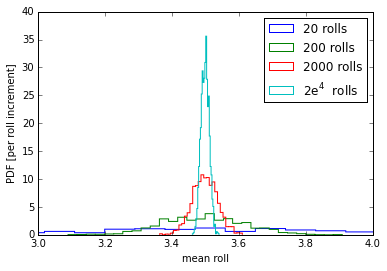

In [25]:
fig,ax=plt.subplots(1,1)
bins = 30
ax.hist(means20,bins,label='20 rolls',histtype='step',normed=True)
ax.hist(means200,bins,label='200 rolls',histtype='step',normed=True)
ax.hist(means2000,bins,label='2000 rolls',histtype='step',normed=True)
ax.hist(means2mil,bins,label='$2e^4$ rolls',histtype='step',normed=True)
ax.set_xlabel('mean roll');ax.set_ylabel('PDF [per roll increment]')
ax.set_xlim([3.,4.])
ax.legend()

So, not only does the distribution get narrower, it looks more like a Normal distribution.  The comparison is a bit hard to see if we do it this way, so lets remove the mean and divide by the standard deviation.  

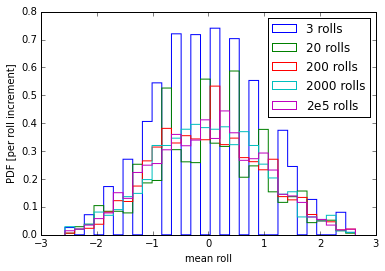

In [30]:
fig,ax=plt.subplots(1,1)
bins = 30
td = [means5,means20,means200,means2000,means2mil]
lab = ['3 rolls','20 rolls','200 rolls','2000 rolls','$2e5$ rolls']
histos=list()
for nn,me in enumerate(td):
    histo, bins, patches = ax.hist((me-np.mean(me))/np.std(me),bins,
                                   label=lab[nn],histtype='step',normed=True)
    histos.append(histo)
ax.set_xlabel('mean roll');ax.set_ylabel('PDF [per roll increment]')
ax.legend()

Looked at this way, we see that even the distribution of the mean of 20 rolls is quite similar to a Normal distribution. 

### Testing if a distribution is Normal.

Informally, we can simply plot a normal distribution on top of our observed distributions.

In [35]:
import matplotlib.mlab as mlab

midbins=bins[0:-1]-np.diff(bins)[0]
y = mlab.normpdf(midbins, 0, 1.)
ax.plot(midbins,y,'k--',label='Normal Dist')
ax.legend()


From this we see that there is not a large difference between 200 rolls and 20,000 rolls in terms of the shape of the distribution.  We have to have as few as three rolls for the difference to be very profound. We can quantify this by taking the square of the difference between the theoretical distribution and the observed:

In [36]:
for i in range(5):
    print '%12s: %2.4f' %(lab[i],np.sum((histos[i]-y)**2))

     3 rolls: 7.4159
    20 rolls: 7.3653
   200 rolls: 7.3176
  2000 rolls: 7.3693
 $2e5$ rolls: 7.3322


Note this is kind of a poor test because the $N_{rolls}=3$ distribution has some bins in it with zeros.  A more fair test is to compare the cumulative distributions.  

     3 rolls: 0.2855
    20 rolls: 0.1912
   200 rolls: 0.2001
  2000 rolls: 0.1923
 $2e5$ rolls: 0.1986


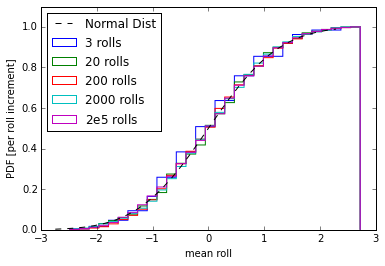

In [37]:
import scipy.stats as stats
fig,ax=plt.subplots(1,1)
bins = 30
td = [means5,means20,means200,means2000,means2mil]
histos=list()
for nn,me in enumerate(td):
    histo, bins, patches = ax.hist((me-np.mean(me))/np.std(me),bins,
                                   label=lab[nn],histtype='step',normed=True,
                                   cumulative=True,align='right')
    histos.append(histo)
ax.set_xlabel('mean roll');ax.set_ylabel('PDF [per roll increment]')
y = stats.norm.cdf(midbins, 0, 1.)
ax.plot(midbins,y,'k--',label='Normal Dist')
ax.legend(loc=2)
ax.set_ylim([0,1.1])
for i in range(5):
    print '%12s: %2.4f' %(lab[i],np.sum((histos[i]-y)**2))

Here we see that three rolls is a poorer fit to the cumulative distributions, but less than twice as bad.  

## Confidence intervals: How do we know if our dice is loaded?

The short answer is that we can never be sure!  Its theoretically possible to roll the dice 200 times, and get 6 every time.  It is very unlikely! And we can quantify exactly how unlikely.  (In this case its $(1/6)^{200}=2.3\times10^{-156}$).  

So, imagine we are only able to roll the dice 200 times, $N_{roll}=200$, before we run out of time, money, or patience.  We know that the mean of those 200 rolls should be 3.5 for the average experiment.  We also know however, that the variance of those means is $2.92/N_{rolls}=0.0146$, or that the standard deviation is $\sigma_{200}=0.121$. From the central limit theorem, we know that the distribution of the means will be a Normal distribution, with mean 3.5, and standard deviation 0.121.    

Since we theoretically know the expected distribution in such pleasant detail, we can easily determine the interval in which we expect 95% of the means from the 200-roll experiments to fall in.  We pick 2.5% and 97.5% off the theoretical cummulitive distribution of the normal curve:

3.26338169085
3.7376188094
(3.2628443578706534, 3.7371556421293466)


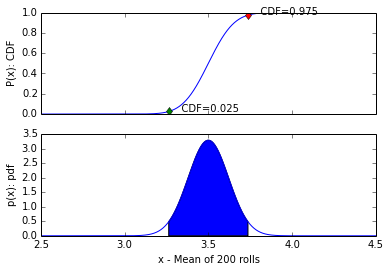

In [297]:
x = np.linspace(3.5-1,3.5+1,2000)
y=stats.norm.cdf(x,loc=3.5,scale=0.121)

fig,axs=plt.subplots(2,1,sharex=True)
ax=axs[0]
ax.plot(x,y)
ind = where(y>=0.025)[0][0]
ax.plot(x[ind],y[ind],'gd')
ax.text(x[ind],y[ind],'    CDF=0.025')
print x[ind]
ind = where(y>=1.-0.025)[0][0]
ax.plot(x[ind],y[ind],'rd')
ax.text(x[ind],y[ind],'    CDF=0.975')

ax.set_ylabel('P(x): CDF')
print x[ind]
# we can also get this from the stats.norm.interval:
interval=stats.norm.interval(0.95,loc=3.5,scale=0.121)
print interval

# plot the pdf.  Fill in 95% of the distribution...
y2=stats.norm.pdf(x,loc=3.5,scale=0.121)
ax=axs[1]
ax.plot(x,y2)
inds=where((x>interval[0]) & (x<interval[1]))
ax.fill_between(x[inds],y2[inds])
ax.set_xlabel('x - Mean of 200 rolls')
ax.set_ylabel('p(x): pdf')

So, from this we see that 95% of the time a 200-roll mean $\{\overline{x}_{200}\}$ will be between 3.26 and 3.74.  

So, how do we turn this into a statistical statement?  If we roll the dice 200 times and calculate $\overline{x}_{200}= 3.75$, we say that 95% of the time this mean will be associated with a different distribution than a fair six-sided dice rolled 200 times, and that this result is significantly different from our null hypothesis that the mean will be 3.5.

Of course that doesn't mean the dice is loaded. And if we were to choose a looser confidence criteria, say 99%, we would not say that this dice was loaded to 99% significance. 

A lot of bad things happen when people talk about significance.  We can't prove this dice is loaded, no matter how significant the results.  If we roll the dice 2000 times and the mean is still near 3.75, then we will have more confidence (well, a lot more) that the dice is loaded.  In fact there is only a $3.2\times10^{-9}\%$ chance that the dice is fair if that is the case.  

In [39]:
# get the value of the cdf for 3.75 if the standard deviation is 
# a factor of sqrt(10) smaller
xx=stats.norm.cdf(3.75,loc=3.5,scale=0.121/np.sqrt(10))
print '%e'%(xx-1.)

-3.209688e-11


### What if we don't know the variance of the distribution?

For the dice roll we knew the standard deviation of the mean of the rolls because we knew the standard deviation of the underlying distribution.  Unfortunately, in life, we are not always given this.  Can we still make statistical inferences about the underlying distribution?  

Note that above, if we knew the variance $\sigma_x^2$ then we could normalize $\overline{x}-\mu$ by the standard deviation, and thus have a Normal distribution of standard devaition 1:

\begin{equation}
      x'=\frac{\overline{x}\sqrt{N}}{\sigma_x}
\end{equation}

Using the same idea we consider the random variable $y$:

\begin{equation}
      x'=\frac{\overline{x}\sqrt{N}}{s_x}
\end{equation}

where $s_x$ is the *sample variance* defined above as 
\begin{equation}
      s_x^2=\frac{1}{N-1}\sum_{i=1}^N \left(x_i-\overline{x}\right)^2
\end{equation}

The random variable $\overline{x}$ is a Normal distribution, as discussed above.

The random variable $s_x^2$ is the sum of $N$ normal distributions squared, N-1 of which are independent.  So, $s_x^2$ is a **Chi-squared** distribution, written $\chi^2_n$, where $n$ is the degrees of freedom, in this case equal to $n=N-1$.  


(0.0, 0.4)

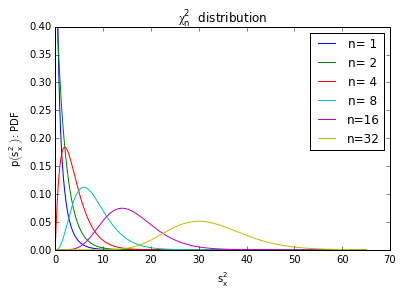

In [41]:
x = np.linspace(0.,65.,1000)
fig,ax=plt.subplots(1,1)
for ndeg in [1,2,4,8,16,32]:
    y=stats.chi2.pdf(x,ndeg)
    ax.plot(x,y,label=('n=%2d'%ndeg))
ax.legend();ax.set_title(r'$\chi^2_n$ distribution'); ax.set_xlabel('$s_x^2$');
ax.set_ylabel(r'$p\left(s_x^2 \right)$: PDF')
ax.set_ylim([0.,0.4])

As $n\to\infty$ the sum approaches a Normal distribution, with mean $\mu_{\chi^2_n}=n$ and variance $\sigma_{\chi^2_n}^2=2n$.

The ratio of these two distributions is called the **student-t distribution**, and governs the distribution of the *sample mean* normalized by the *sample variance*.  

(0.0, 0.4)

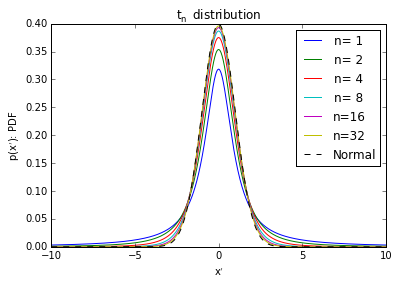

In [42]:
x = np.linspace(-10,10.,1000)
fig,ax=plt.subplots(1,1)
for ndeg in [1,2,4,8,16,32]:
    y=stats.t.pdf(x,ndeg)
    ax.plot(x,y,label=('n=%2d'%ndeg))
y=stats.norm.pdf(x)
ax.plot(x,y,'k--',label='Normal')
ax.legend();ax.set_title('$t_n$ distribution'); ax.set_xlabel(r'$x\prime$')
ax.set_ylabel('$p(x\prime)$: PDF')
ax.set_ylim([0.,0.4])

For large-N the student-t distribution of $x'$ looks just like the Normal distribution.  for smaller values of N, the distribution has larger tails.

### Applying student-t to the dice rolls?

Rolling the dice 200 times means we have 199 degrees of freedom for the student-t distribution.  So that gives us an idea what the 95% confidence intervals are for any value of $\overline{x}_{200}\sqrt{N}/s_x$ are.  

In [43]:
interval=stats.t.interval(0.95,df=199)
print interval

(-1.9719565442493949, 1.9719565442493949)


So we do one experiment, report the mean, and compute the 95% confidence intervals:

In [45]:
xx=getrolls(200,theseed=4590)
xbar = np.mean(xx)
sx = np.var(xx,ddof=1)

print xbar
print sx
inter = interval[1]*sx/np.sqrt(200)
print '%1.2f +/- %1.2f'%(xbar,inter)

3.575
2.71796482412
3.58 +/- 0.38


So, this says that the mean of the underlying distribution lies between 3.2 and 3.96 95% of the time.  

Of course with fewer rolls, these 95% confidence intervals get much larger:

In [48]:
Nrolls=20
xx=getrolls(Nrolls,theseed=467)
xbar = np.mean(xx)
sx = np.var(xx,ddof=1)

inter = interval[1]*sx/np.sqrt(Nrolls)
print '%1.2f +/- %1.2f'%(xbar,inter)

3.30 +/- 1.95


## Monte Carlo simulations

What we have been doing with the dice example is performing simple [Monte Carlo](http://en.wikipedia.org/wiki/Monte_Carlo_method) simulations.  All this means is that we  simulated random realizations of our experiments and looked at the statistics of the results.  When possible, it is always desireable to determine the statistical character of an experiment analytically from first principals.  For instance, we can pretty readily deduce that the mean roll of a six-sided dice will be 3.5, and that the variance of the rolls will be 2.92, and that if we average $N$ rolls together, the average will have a variance of $2.92/N$.  However, if the function we want to know the distribution of was a lot more complicated than a simple mean of variables with a known distribution, we can resort to Monte Carlo simulations to determine the structure of the resulting distribution.

### Example

Suppose instead of wanting to know the distribution of $\overline{x}$ we want to know the distribution of $\overline{\exp(x)}$, where again $x(k)$ are dice rolls from a six-sided dice?  The very simple form of the dice rolls makes the answer easy to calculate, but lets infer it from running Monte Carlo experiments just like we did above.

Nrolls mean +/- std;       std*sqrt(N)
   1 104.918 +/- 141.687; 141.687
   3 103.867 +/-  80.197; 138.905
  30 106.527 +/-  25.562; 140.007
 300 105.888 +/-   8.265; 143.152
3000 106.206 +/-   2.603; 142.546


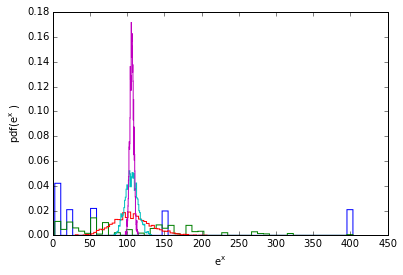

In [52]:
fig,ax=plt.subplots(1,1)
print 'Nrolls mean +/- std;       std*sqrt(N)'
for Nrolls in [1,3,30,300,3000]:
    xx = getRollsExpt(Nrolls,2000)
    means = np.mean(np.exp(xx),axis=1)
    
    ax.hist(means,50,histtype='step',normed=True)
    print '%4d %1.3f +/- %7.3f; %5.3f'%(Nrolls,np.mean(means),np.sqrt(np.var(means)),
                                    np.sqrt(Nrolls*np.var(means)))
ax.set_xlabel('$e^x$');ax.set_ylabel('$pdf(e^x$)');